In [ ]:
# dataset to be used: "Medical-Insurance.csv"
# upload datasets to a folder in Google Drive, e.g., My Drive/Colab Data
# connect to Google Drive, path to datasets is "/content/drive/My Drive/Colab Data/..."
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# after installation, import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *


# sklearn data and model packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

# sklearn model metrics (evaluation) packages
from sklearn.metrics import *

# regression summary
!pip install -U dmba;
from dmba import regressionSummary

# Decision Tree Requirements
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

#LogisticRegression Requirements
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 82.5 MB/s eta 0:00:00
Colab environment detected.


In [ ]:
# Medical Insurance Cost Per Person - Medical-Insurance.csv

# load data as a Dataframe
insurance_df = pd.read_csv("/content/drive/My Drive/Colab Data/Medical-Insurance.csv", header=None)
insurance_df.columns = ['age', 'gender', 'BMI', 'children', 'smoker', 'region', 'insurance_price']

# check if data is loaded correctly
insurance_df.head(10)

#(Add int mod here)


age  gender     BMI  children smoker  region  insurance_price
0  19       1  27.900         0      1       3      16884.92400
1  18       2  33.770         1      0       4       1725.55230
2  28       2  33.000         3      0       4       4449.46200
3  33       2  22.705         0      0       1      21984.47061
4  32       2  28.880         0      0       1       3866.85520
5  31       1  25.740         0      ?       4       3756.62160
6  46       1  33.440         1      0       4       8240.58960
7  37       1  27.740         3      0       1       7281.50560
8  37       2  29.830         2      0       2       6406.41070
9  60       1  25.840         0      0       1      28923.13692

In [ ]:
# print a concise summary of the Dataframe
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2772 non-null   object 
 1   gender           2772 non-null   int64  
 2   BMI              2772 non-null   float64
 3   children         2772 non-null   int64  
 4   smoker           2772 non-null   object 
 5   region           2772 non-null   int64  
 6   insurance_price  2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [ ]:
## Missing Values Block
# Missing counts of age
age_null = (insurance_df["age"] == "?").sum()
print('Missing Age Count')
print(age_null)
# Missing Count of Smoking
smoker_null = (insurance_df["smoker"] == "?").sum()
print('Missing Smoke Count')
print(smoker_null)


Missing Age Count
4
Missing Smoke Count
7
___
Rows with missing values
Index([5, 28, 72, 122, 176, 234, 242, 324, 1836, 2180, 2664], dtype='int64')


In [ ]:
# print all the rows with a missing value (?)
row_with_null = insurance_df.index[insurance_df.eq('?').any(axis=1)]
print('___')
print("Rows with missing values")
print(row_with_null)
print("Total null values:", len(row_with_null))

___
Rows with missing values
Index([5, 28, 72, 122, 176, 234, 242, 324, 1836, 2180, 2664], dtype='int64')
Total null values: 11


In [ ]:
### NEEDED TO RUN FOR SET UP

# drop missing values
insurance_df = insurance_df.drop(row_with_null)

# rest the index after dropping empty row
insurance_df = insurance_df.reset_index(drop=True)
insurance_df

insurance_df.head(10)

age  gender     BMI  children smoker  region  insurance_price
0  19       1  27.900         0      1       3      16884.92400
1  18       2  33.770         1      0       4       1725.55230
2  28       2  33.000         3      0       4       4449.46200
3  33       2  22.705         0      0       1      21984.47061
4  32       2  28.880         0      0       1       3866.85520
5  46       1  33.440         1      0       4       8240.58960
6  37       1  27.740         3      0       1       7281.50560
7  37       2  29.830         2      0       2       6406.41070
8  60       1  25.840         0      0       1      28923.13692
9  25       2  26.220         0      0       2       2721.32080

In [ ]:
# convert the age and smoker columns into integers
insurance_df['age'] = insurance_df['age'].astype(int)
insurance_df['smoker'] = insurance_df['smoker'].astype(int)

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2761 non-null   int64  
 1   gender           2761 non-null   int64  
 2   BMI              2761 non-null   float64
 3   children         2761 non-null   int64  
 4   smoker           2761 non-null   int64  
 5   region           2761 non-null   int64  
 6   insurance_price  2761 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.1 KB


In [ ]:
# correlation table
corr_mat = insurance_df.corr()
corr_mat

age    gender       BMI  children    smoker    region  \
age              1.000000 -0.025362  0.112373  0.036304 -0.023661 -0.008419   
gender          -0.025362  1.000000  0.043968  0.015239  0.081855  0.023422   
BMI              0.112373  0.043968  1.000000 -0.001392  0.010444  0.270823   
children         0.036304  0.015239 -0.001392  1.000000  0.007045 -0.025228   
smoker          -0.023661  0.081855  0.010444  0.007045  1.000000  0.053867   
region          -0.008419  0.023422  0.270823 -0.025228  0.053867  1.000000   
insurance_price  0.297487  0.063768  0.199372  0.066809  0.789585  0.053016   

                 insurance_price  
age                     0.297487  
gender                  0.063768  
BMI                     0.199372  
children                0.066809  
smoker                  0.789585  
region                  0.053016  
insurance_price         1.000000

In [ ]:
# Filter the DataFrame to show rows where insurance_price is greater than 60000
high_insurance_price_df = insurance_df[insurance_df['insurance_price'] > 60000]

# Display the resulting DataFrame
display(high_insurance_price_df)


#### DECIDE WHAT VALUES TO CUT ####

age  gender     BMI  children  smoker  region  insurance_price
535    54       1  47.410         0       1       4      63770.42801
1222   52       2  34.485         3       1       1      60021.39897
1292   45       2  30.360         0       1       4      62592.87309
1920   54       1  47.410         0       1       4      63770.42801
2606   52       2  34.485         3       1       1      60021.39897
2675   45       2  30.360         0       1       4      62592.87309

High correlation between smoker and insurance_price

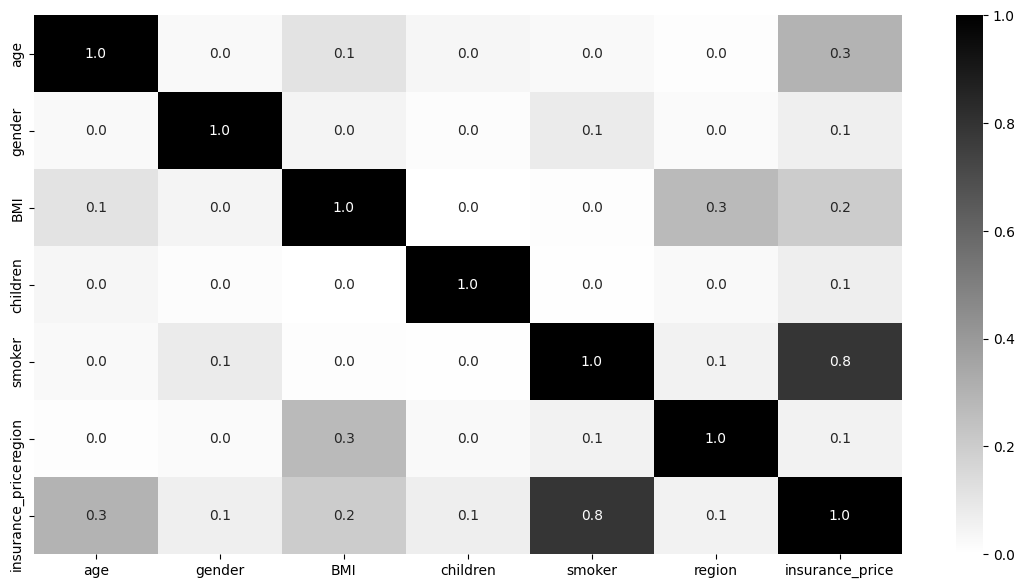

In [ ]:
# heatmap
plt.figure(figsize=(14,7))
sns.heatmap(np.absolute(corr_mat), annot=True, fmt=".1f", vmin=0, vmax=1, cmap="gray_r");

In [ ]:
smokers_by_region = insurance_df[insurance_df['smoker'] == 1]['region'].value_counts()
print(smokers_by_region)

region
4    192
2    135
3    118
1    118
Name: count, dtype: int64


Text(0.5, 1.0, 'Insurance Price Distribution')

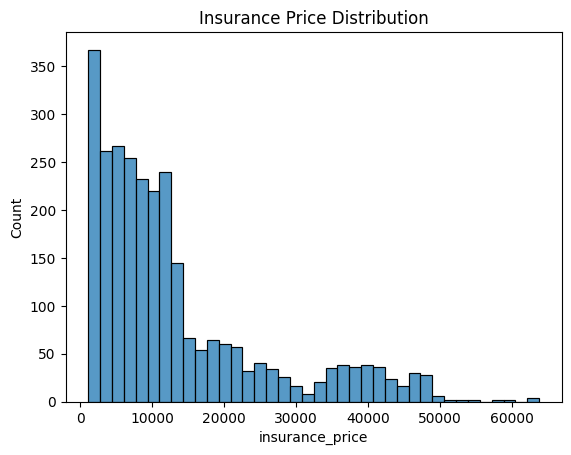

In [ ]:
sns.histplot(data=insurance_df, x="insurance_price")
plt.title("Insurance Price Distribution")

Text(0.5, 1.0, 'Smoker vs. Insurance Price Distribution')

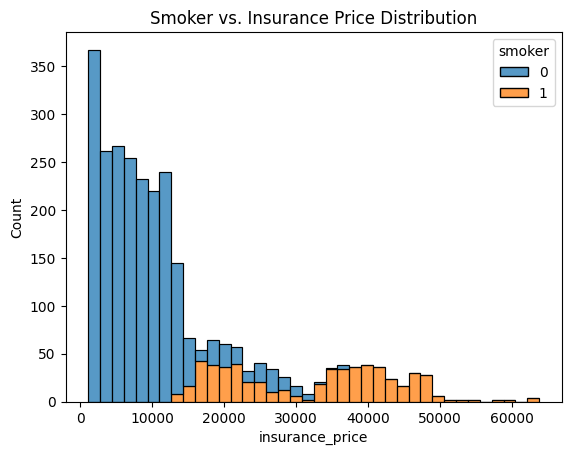

In [ ]:
sns.histplot(data=insurance_df, x="insurance_price", hue="smoker", multiple = "stack")
plt.title("Smoker vs. Insurance Price Distribution")

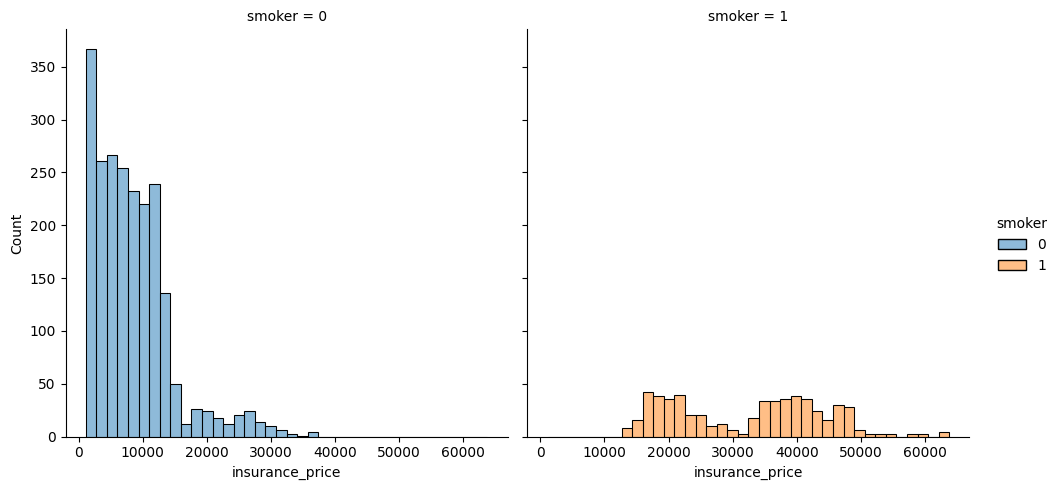

In [ ]:
sns.displot(data=insurance_df, x="insurance_price", hue="smoker", col="smoker")

Text(0, 0.5, 'Avg. Insurance Price')

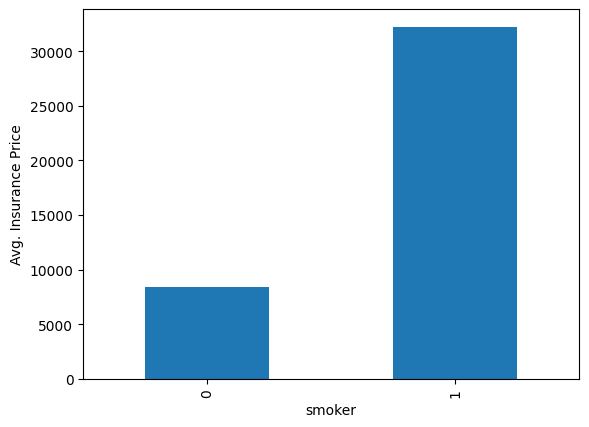

In [ ]:
### Set up ###
smoker_prices = insurance_df.groupby('smoker').insurance_price.mean()
# barchart of smoker vs. mean insurance price
ax = smoker_prices.plot(kind='bar')
ax.set_ylabel('Avg. Insurance Price')

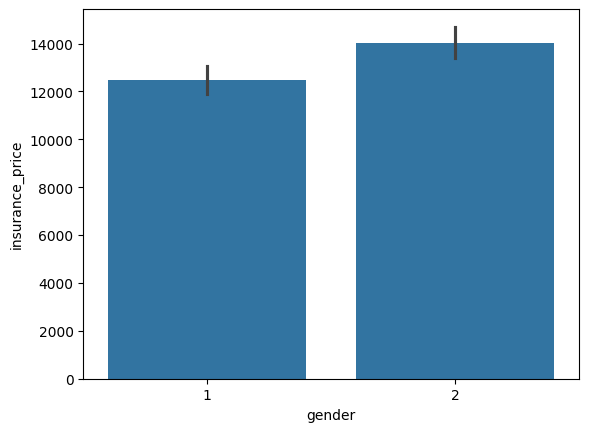

In [ ]:
sns.barplot(data=insurance_df, x='gender', y='insurance_price');

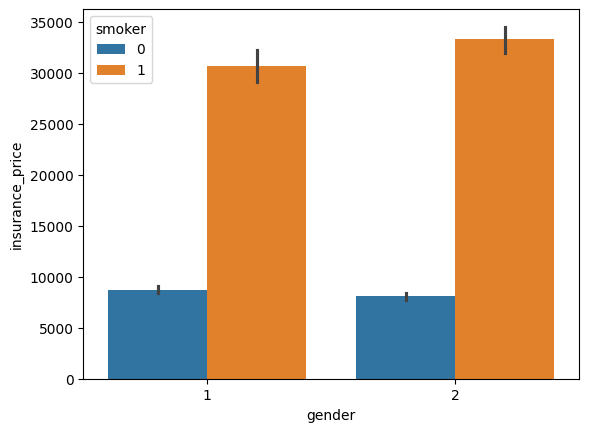

In [ ]:
sns.barplot(data=insurance_df, x='gender', y='insurance_price', hue='smoker');

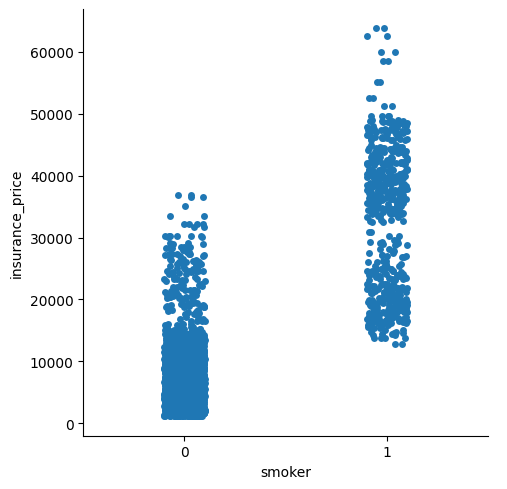

In [ ]:
sns.catplot(data=insurance_df, x='smoker', y='insurance_price')

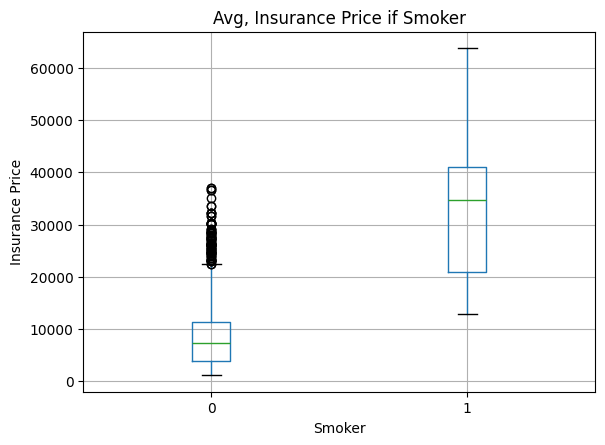

In [ ]:
# boxplot of smoker vs. insurance price
ax = insurance_df.boxplot(column='insurance_price', by='smoker');
ax.set_xlabel('Smoker');
ax.set_ylabel('Insurance Price');
plt.suptitle('');
plt.title('Avg, Insurance Price if Smoker');

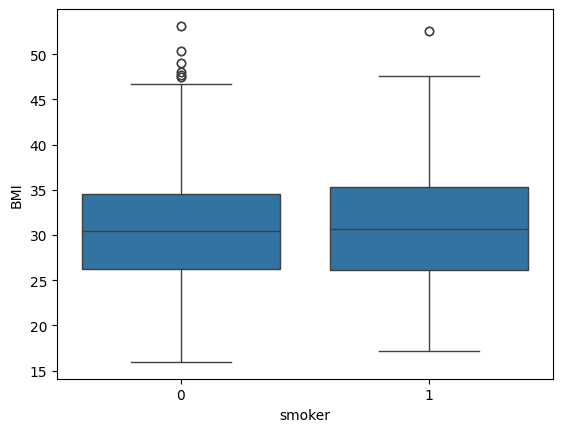

In [ ]:
sns.boxplot(data=insurance_df, x='smoker', y='BMI');

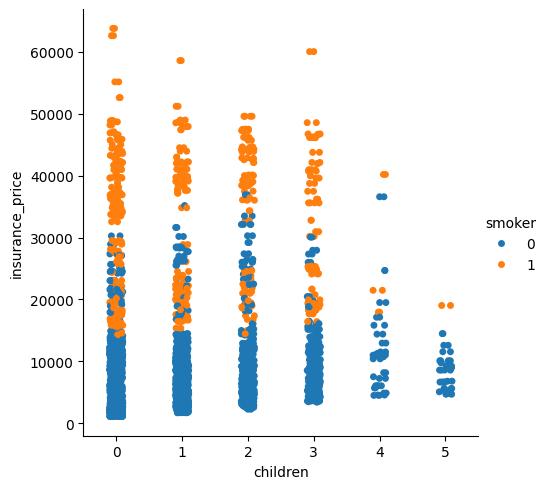

In [ ]:
sns.catplot(data=insurance_df, x='children', y='insurance_price', hue='smoker');

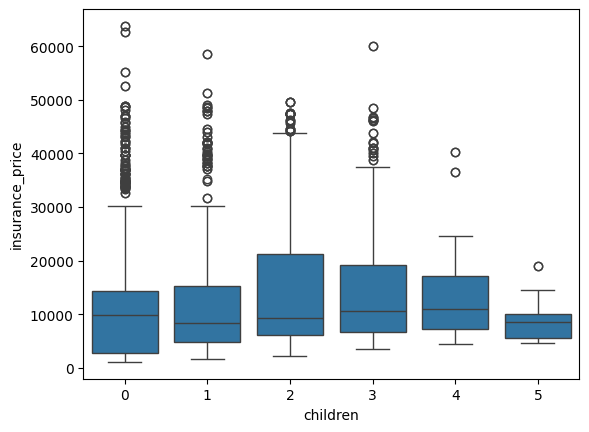

In [ ]:
sns.boxplot(data=insurance_df, x='children', y='insurance_price');

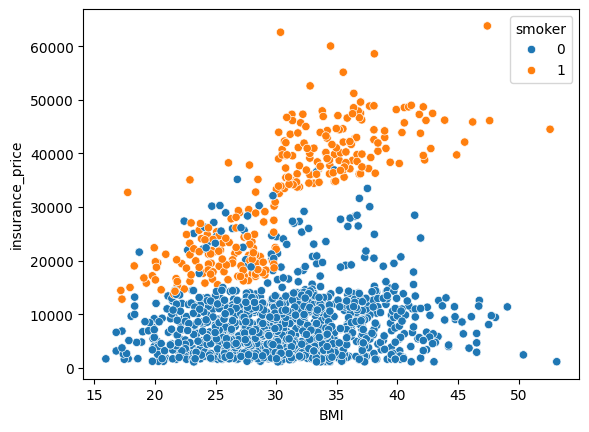

In [ ]:
sns.scatterplot(data=insurance_df, x='BMI', y='insurance_price', hue='smoker');

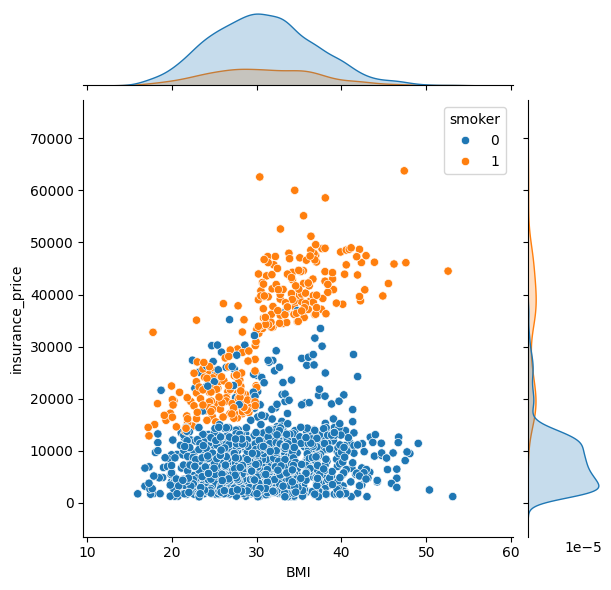

In [ ]:
sns.jointplot(data=insurance_df, x='BMI', y='insurance_price', hue='smoker');

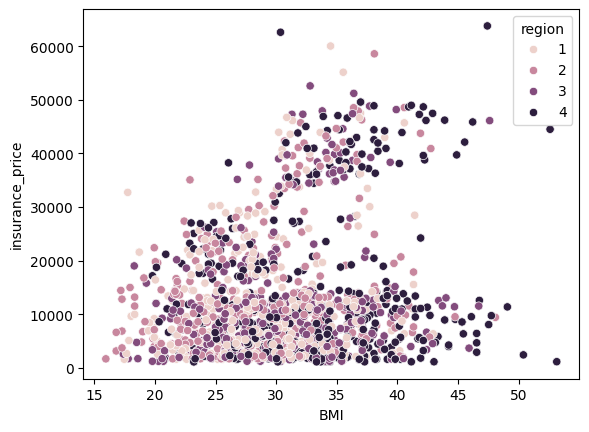

In [ ]:
sns.scatterplot(data=insurance_df, x='BMI', y='insurance_price', hue='region');

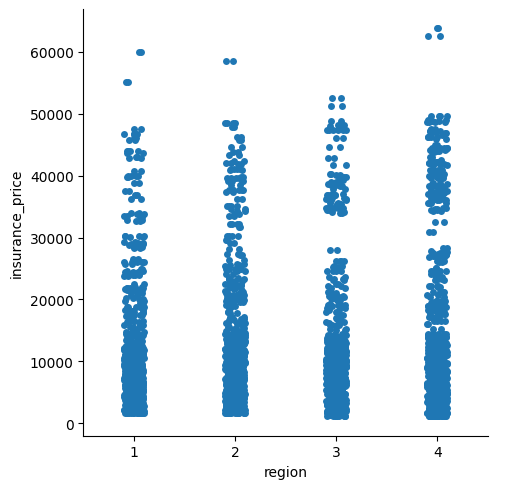

In [ ]:
sns.catplot(data=insurance_df, x='region', y='insurance_price');

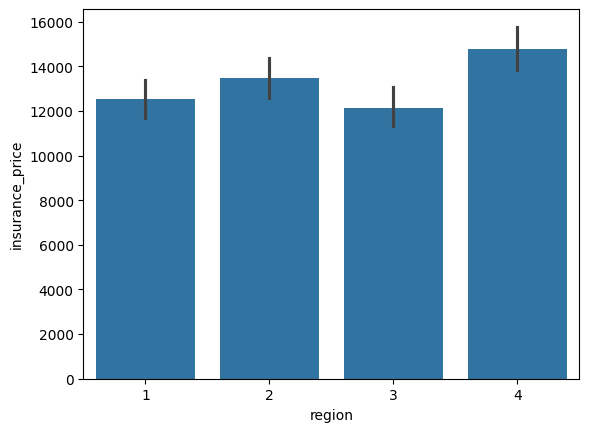

In [ ]:
sns.barplot(data=insurance_df, x='region', y='insurance_price');

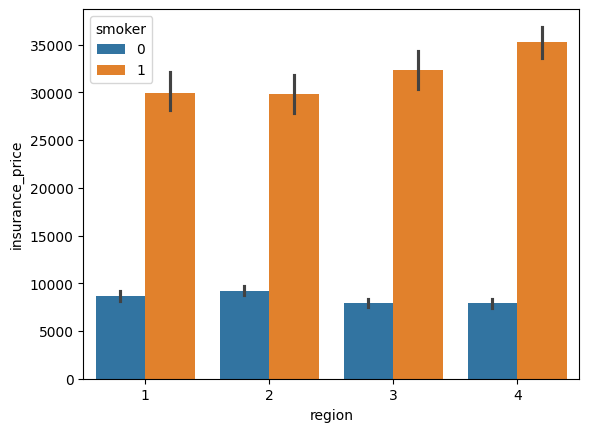

In [ ]:
sns.barplot(data=insurance_df, x='region', y='insurance_price', hue="smoker");

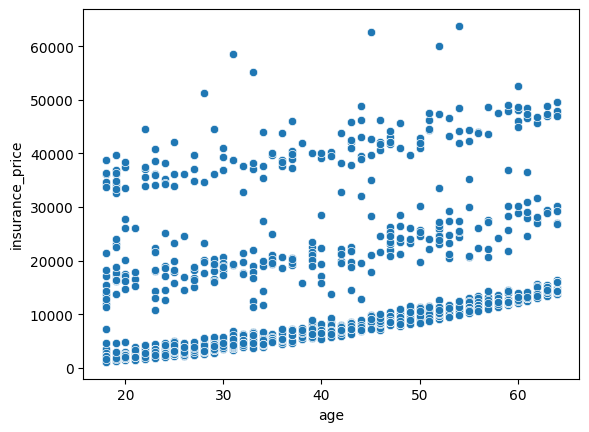

In [ ]:
sns.scatterplot(data=insurance_df, x='age', y='insurance_price');

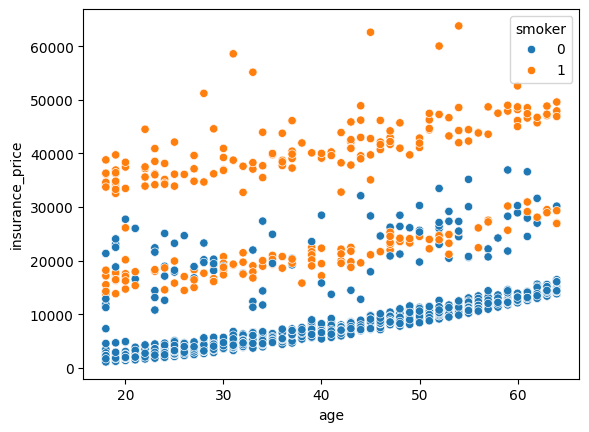

In [ ]:
sns.scatterplot(data=insurance_df, x='age', y='insurance_price', hue='smoker');

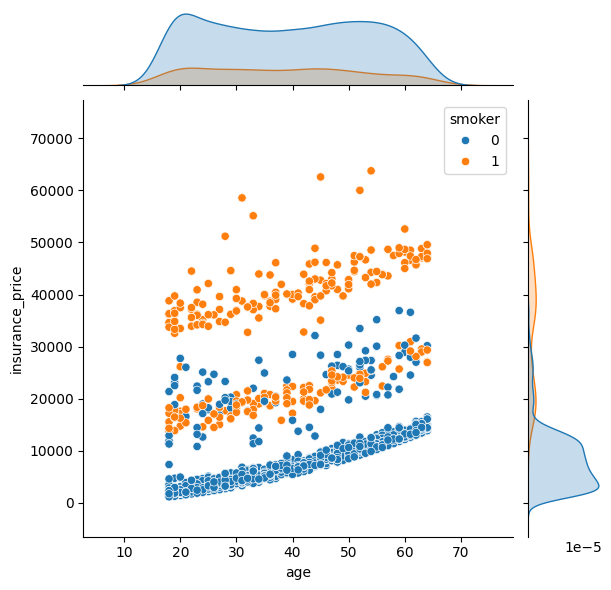

In [ ]:
sns.jointplot(data=insurance_df, x='age', y='insurance_price', hue='smoker');

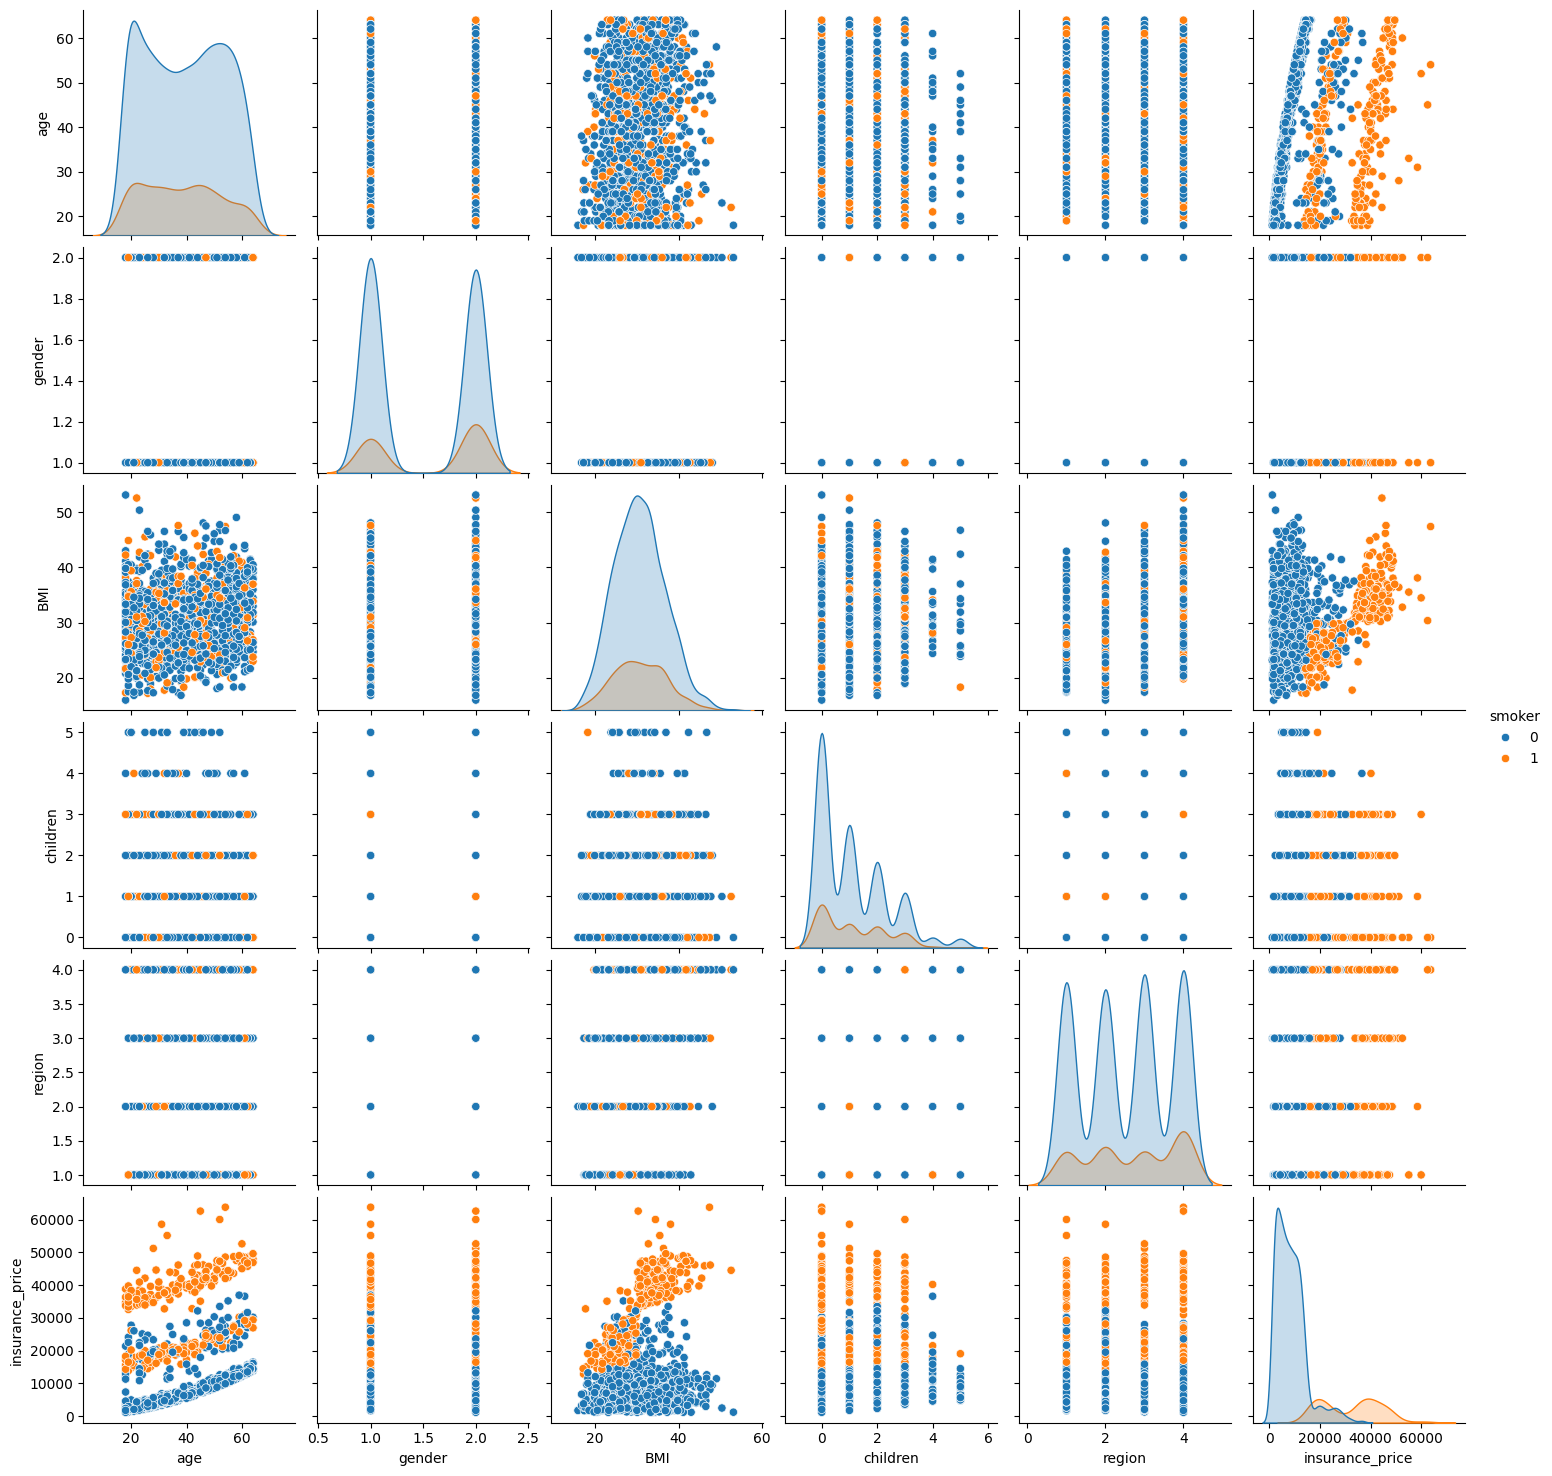

In [ ]:
sns.pairplot(data=insurance_df, hue='smoker');

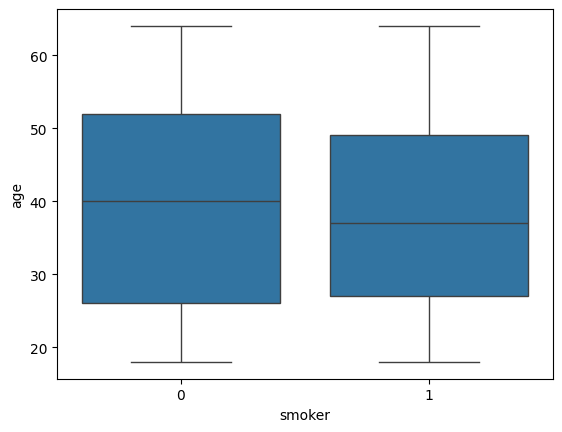

In [ ]:
sns.boxplot(data=insurance_df, x='smoker', y='age');

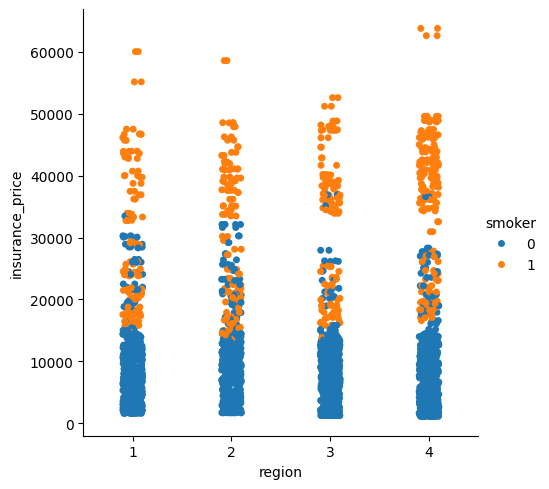

In [ ]:
sns.catplot(data=insurance_df, x='region', y='insurance_price', hue='smoker')

<Axes: xlabel='region', ylabel='count'>

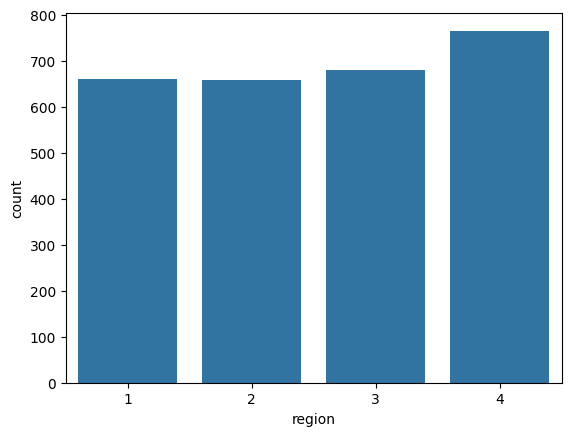

In [ ]:
sns.countplot(data=insurance_df, x="region")

In [ ]:
X = insurance_df.drop('insurance_price',axis=1)
y = insurance_df['insurance_price'].values

In [ ]:
# Define categorical & numeric columns
categorical = ["gender", "smoker", "region"]
numeric = ["age", "BMI", "children"]

# Preprocessing: OneHotEncode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical),
        ("num", "passthrough", numeric)
    ]
)

# Build pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [ ]:
#Linear Regression model
model.fit(X_train, y_train)


# extract the predictions of the model using the X test set
# careful, this assumes a cutoff probability of 50% to make classification decisions
y_pred = model.predict(X_test)

In [ ]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(results_df.head(20))

Actual     Predicted
0   11455.28000  11163.309748
1   14256.19280  12941.477226
2   11554.22360  11252.756816
3   42211.13820  35440.258095
4   36898.73308  27752.113361
5    1526.31200   2545.546078
6   10797.33620  12623.188185
7    2020.55230   4017.960757
8    9850.43200  11204.405266
9    8605.36150   6542.628302
10   1635.73365   2001.373750
11  13635.63790  16199.077262
12   1832.09400   -934.250884
13  26140.36030   9031.803918
14   6360.99360  12240.063178
15   6551.75010  10517.342391
16   4527.18295   5650.452252
17  13415.03810  10701.742295
18  21659.93010  32250.530409
19   4536.25900  10323.452833

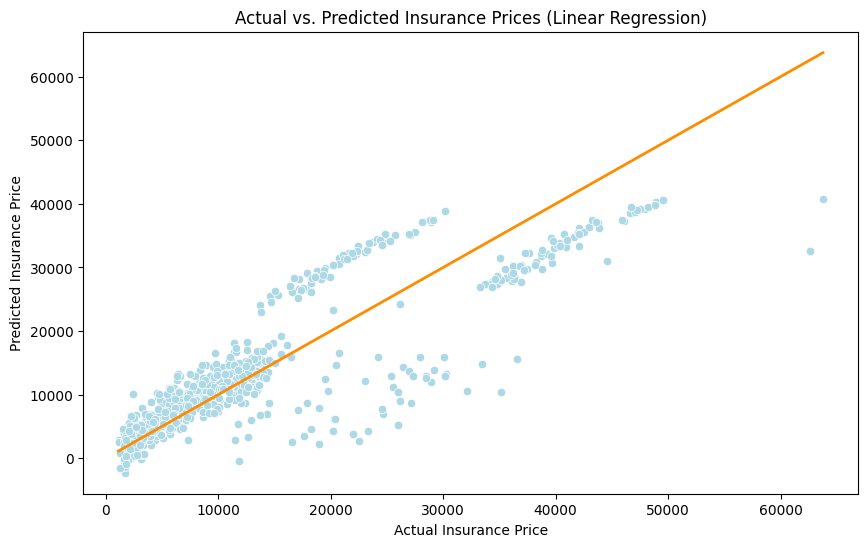

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Actual', y='Predicted', color='lightblue')
plt.title('Actual vs. Predicted Insurance Prices (Linear Regression)')
plt.xlabel('Actual Insurance Price')
plt.ylabel('Predicted Insurance Price')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'darkorange', lw=2) # Add diagonal line
plt.show()

In [ ]:
# print accuracy score of model
print("R^2 score:", model.score(X_test, y_test))

R^2 score: 0.7475906484132921


In [ ]:
# print regression statistics
regressionSummary(y_pred, y_test)


Regression statistics

                      Mean Error (ME) : -210.7264
       Root Mean Squared Error (RMSE) : 6050.2185
            Mean Absolute Error (MAE) : 4113.6051
          Mean Percentage Error (MPE) : 3.1881
Mean Absolute Percentage Error (MAPE) : 78.0724


In [ ]:
# Define categorical & numeric columns
categorical = ["gender", "smoker", "region"]
numeric = ["age", "BMI", "children"]

# Preprocessing: OneHotEncode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical),
        ("num", "passthrough", numeric)
    ]
)

# Build pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor())
])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [ ]:
#Gradient Boosting Regression model
model.fit(X_train, y_train)


# extract the predictions of the model using the X test set
# careful, this assumes a cutoff probability of 50% to make classification decisions
y_pred = model.predict(X_test)

In [ ]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(results_df.head(20))

Actual     Predicted
0   11455.28000  11453.054795
1   14256.19280  14056.677204
2   11554.22360  12239.966944
3   42211.13820  42644.699649
4   36898.73308  35545.489839
5    1526.31200   2399.351993
6   10797.33620  13296.418589
7    2020.55230   2629.393755
8    9850.43200  11724.582402
9    8605.36150   8706.462649
10   1635.73365   3025.838322
11  13635.63790  15544.693835
12   1832.09400   2090.229138
13  26140.36030   9755.929676
14   6360.99360   6403.307433
15   6551.75010   8893.135387
16   4527.18295   6033.916085
17  13415.03810  13399.282271
18  21659.93010  20767.232717
19   4536.25900   4858.792810

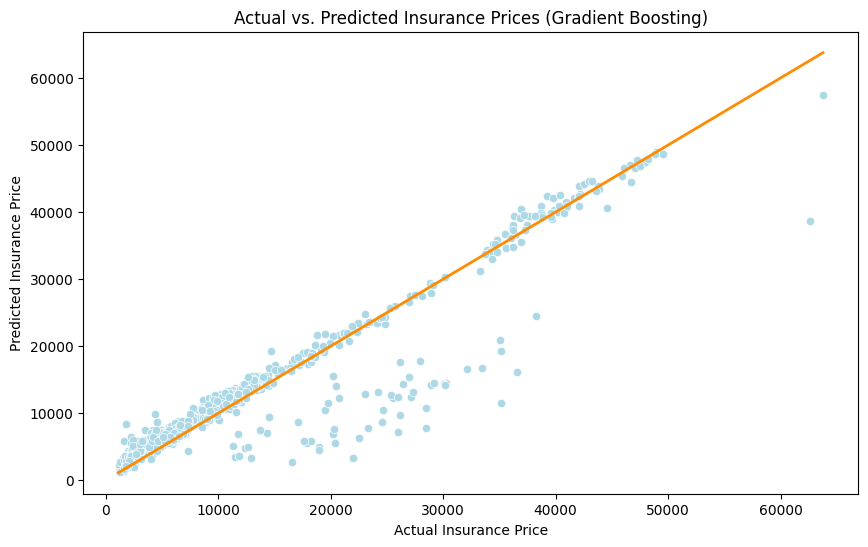

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Actual', y='Predicted', color='lightblue')
plt.title('Actual vs. Predicted Insurance Prices (Gradient Boosting)')
plt.xlabel('Actual Insurance Price')
plt.ylabel('Predicted Insurance Price')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'darkorange', lw=2) # Add diagonal line
plt.show()

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print("R^2 score:", model.score(X_test, y_test))

Mean Absolute Error (MAE): 2208.4875352596055
Mean Squared Error (MSE): 18529739.67968218
Root Mean Squared Error (RMSE): 4304.618412784364
R^2 score: 0.8722288993059151


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "regressor__n_estimators": [100, 200, 300],
    "regressor__learning_rate": [0.05, 0.1, 0.2],
    "regressor__max_depth": [3, 5, 7],
    "regressor__subsample": [0.8, 1.0]
}

grid = GridSearchCV(model, param_grid, cv=5, scoring="r2")
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Best params: {'regressor__learning_rate': 0.2, 'regressor__max_depth': 7, 'regressor__n_estimators': 100, 'regressor__subsample': 0.8}
Best score: 0.9308248644704928


In [ ]:
y_pred_tuned = grid.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Mean Absolute Error (MAE) [Tuned Model]: {mae_tuned}")
print(f"Mean Squared Error (MSE) [Tuned Model]: {mse_tuned}")
print(f"Root Mean Squared Error (RMSE) [Tuned Model]: {rmse_tuned}")
print(f"R^2 score [Tuned Model]: {r2_tuned}")

Mean Absolute Error (MAE) [Tuned Model]: 1150.8095924016832
Mean Squared Error (MSE) [Tuned Model]: 10618170.554751664
Root Mean Squared Error (RMSE) [Tuned Model]: 3258.5534451274025
R^2 score [Tuned Model]: 0.9267828171042384


In [ ]:
results_df_tuned = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_tuned})
display(results_df_tuned.head(20))

Actual     Predicted
0   11455.28000  10877.130173
1   14256.19280  14203.474856
2   11554.22360  11828.070313
3   42211.13820  42126.131285
4   36898.73308  33775.838298
5    1526.31200   1743.803671
6   10797.33620  11274.651124
7    2020.55230   2035.416305
8    9850.43200   9909.138319
9    8605.36150   8573.843971
10   1635.73365   1941.861593
11  13635.63790  13851.492979
12   1832.09400   -118.962254
13  26140.36030   9409.772656
14   6360.99360   6818.551590
15   6551.75010   6791.961596
16   4527.18295   3946.939937
17  13415.03810  13491.598229
18  21659.93010  21536.535159
19   4536.25900   7257.256081

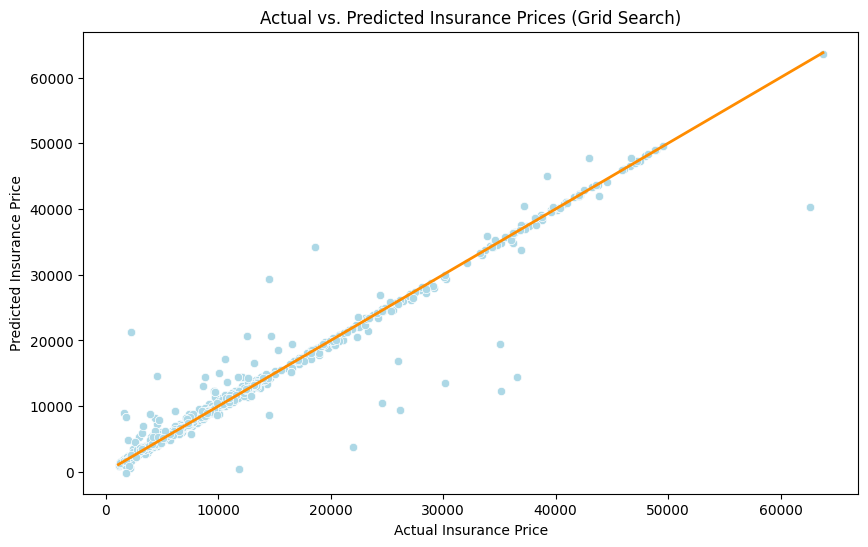

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df_tuned, x='Actual', y='Predicted', color='lightblue')
plt.title('Actual vs. Predicted Insurance Prices (Grid Search)')
plt.xlabel('Actual Insurance Price')
plt.ylabel('Predicted Insurance Price')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'darkorange', lw=2) # Add diagonal line
plt.show()

In [ ]:
# Access the best trained model from the grid search
best_model = grid.best_estimator_

# Get the feature importances from the Gradient Boosting Regressor
feature_importances = best_model.named_steps['regressor'].feature_importances_

# Get the feature names after preprocessing
preprocessor = best_model.named_steps['preprocessor']
onehot_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical)
numeric_features = numeric
feature_names = list(onehot_features) + numeric_features

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

display(feature_importance_df)

Feature  Importance
1  smoker_1    0.610933
6       BMI    0.226633
5       age    0.120273
7  children    0.019519
2  region_2    0.007959
4  region_4    0.006081
0  gender_2    0.005926
3  region_3    0.002675

# Task
Experiment with removing less important features and compare the model performance with the previous model.

## Drop less important features

### Subtask:
Create a new DataFrame `X_reduced` by dropping 'gender' and 'region' columns from the original `insurance_df`.


**Reasoning**:
Create a new DataFrame `X_reduced` by dropping the specified columns from `insurance_df`.



In [ ]:
X_reduced = insurance_df.drop(['gender', 'region', 'insurance_price'], axis=1)
display(X_reduced.head())

age     BMI  children  smoker
0   19  27.900         0       1
1   18  33.770         1       0
2   28  33.000         3       0
3   33  22.705         0       0
4   32  28.880         0       0

## Split data

### Subtask:
Split the `X_reduced` and `y` data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets.



In [ ]:
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=2)

## Define pipeline for reduced features

### Subtask:
Update the preprocessor to only include the remaining features and build a new pipeline with the tuned Gradient Boosting Regressor using the best parameters found previously.


**Reasoning**:
Update the preprocessor to only include the remaining features and build a new pipeline with the tuned Gradient Boosting Regressor using the best parameters found previously.



In [ ]:
# Define categorical & numeric columns based on X_reduced
categorical_reduced = ["smoker"]
numeric_reduced = ["age", "BMI", "children"]

# Update Preprocessing: OneHotEncode categorical features
preprocessor_reduced = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_reduced),
        ("num", "passthrough", numeric_reduced)
    ]
)

# Build pipeline with the tuned Gradient Boosting Regressor
model_reduced = Pipeline(steps=[
    ("preprocessor", preprocessor_reduced),
    ("regressor", GradientBoostingRegressor(
        n_estimators=grid.best_params_['regressor__n_estimators'],
        learning_rate=grid.best_params_['regressor__learning_rate'],
        max_depth=grid.best_params_['regressor__max_depth'],
        subsample=grid.best_params_['regressor__subsample']
    ))
])

## Train model

### Subtask:
Train the new pipeline model on the reduced training data.


**Reasoning**:
Fit the model with the reduced training data.



In [ ]:
model_reduced.fit(X_train_reduced, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['smoker']),
                                                 ('num', 'passthrough',
                                                  ['age', 'BMI',
                                                   'children'])])),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.2, max_depth=7,
                                           subsample=0.8))])

## Evaluate model

### Subtask:
Predict on the reduced test data and calculate evaluation metrics (MAE, MSE, RMSE, R-squared).


**Reasoning**:
Make predictions using the trained model on the reduced test data and calculate the evaluation metrics.



In [ ]:
y_pred_reduced = model_reduced.predict(X_test_reduced)

mae_reduced = mean_absolute_error(y_test, y_pred_reduced)
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
rmse_reduced = np.sqrt(mse_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)

print(f"Mean Absolute Error (MAE) [Reduced Model]: {mae_reduced}")
print(f"Mean Squared Error (MSE) [Reduced Model]: {mse_reduced}")
print(f"Root Mean Squared Error (RMSE) [Reduced Model]: {rmse_reduced}")
print(f"R^2 score [Reduced Model]: {r2_reduced}")

Mean Absolute Error (MAE) [Reduced Model]: 1187.6210625421425
Mean Squared Error (MSE) [Reduced Model]: 10152165.806691438
Root Mean Squared Error (RMSE) [Reduced Model]: 3186.2463505968017
R^2 score [Reduced Model]: 0.9299961347556251


## Compare results

### Subtask:
Compare the evaluation metrics of the model with reduced features to the metrics of the model with all features.


**Reasoning**:
Print the evaluation metrics for both the tuned model and the reduced model for comparison.



In [ ]:
print("Evaluation Metrics for Tuned Model (All Features):")
print(f"Mean Absolute Error (MAE): {mae_tuned}")
print(f"Mean Squared Error (MSE): {mse_tuned}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned}")
print(f"R^2 score: {r2_tuned}")
print("\nEvaluation Metrics for Reduced Model (Less Important Features Removed):")
print(f"Mean Absolute Error (MAE): {mae_reduced}")
print(f"Mean Squared Error (MSE): {mse_reduced}")
print(f"Root Mean Squared Error (RMSE): {rmse_reduced}")
print(f"R^2 score: {r2_reduced}")

Evaluation Metrics for Tuned Model (All Features):
Mean Absolute Error (MAE): 1150.8095924016832
Mean Squared Error (MSE): 10618170.554751664
Root Mean Squared Error (RMSE): 3258.5534451274025
R^2 score: 0.9267828171042384

Evaluation Metrics for Reduced Model (Less Important Features Removed):
Mean Absolute Error (MAE): 1187.6210625421425
Mean Squared Error (MSE): 10152165.806691438
Root Mean Squared Error (RMSE): 3186.2463505968017
R^2 score: 0.9299961347556251


# Regression Tree

In [ ]:
# Import the Regression Tree classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

!pip install dtreeviz
import dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.8 MB/s eta 0:00:00


In [ ]:
# Re-define X and y
y_tree = insurance_df['insurance_price']
X_tree = insurance_df.drop(columns=['insurance_price'])

In [ ]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_tree, y_tree, test_size=0.4, random_state=2)

In [ ]:
# Call the Decision Tree Object with parameters
# We're going to set max depth to 5 to keep things manageable
clf_reg = DecisionTreeRegressor(
      max_depth=5,
      min_samples_split = 40,
      min_samples_leaf = 100,
      min_impurity_decrease = 0.01,
      criterion = 'squared_error')

# Fit the model to the training data
clf_reg.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0.01,
                      min_samples_leaf=100, min_samples_split=40)

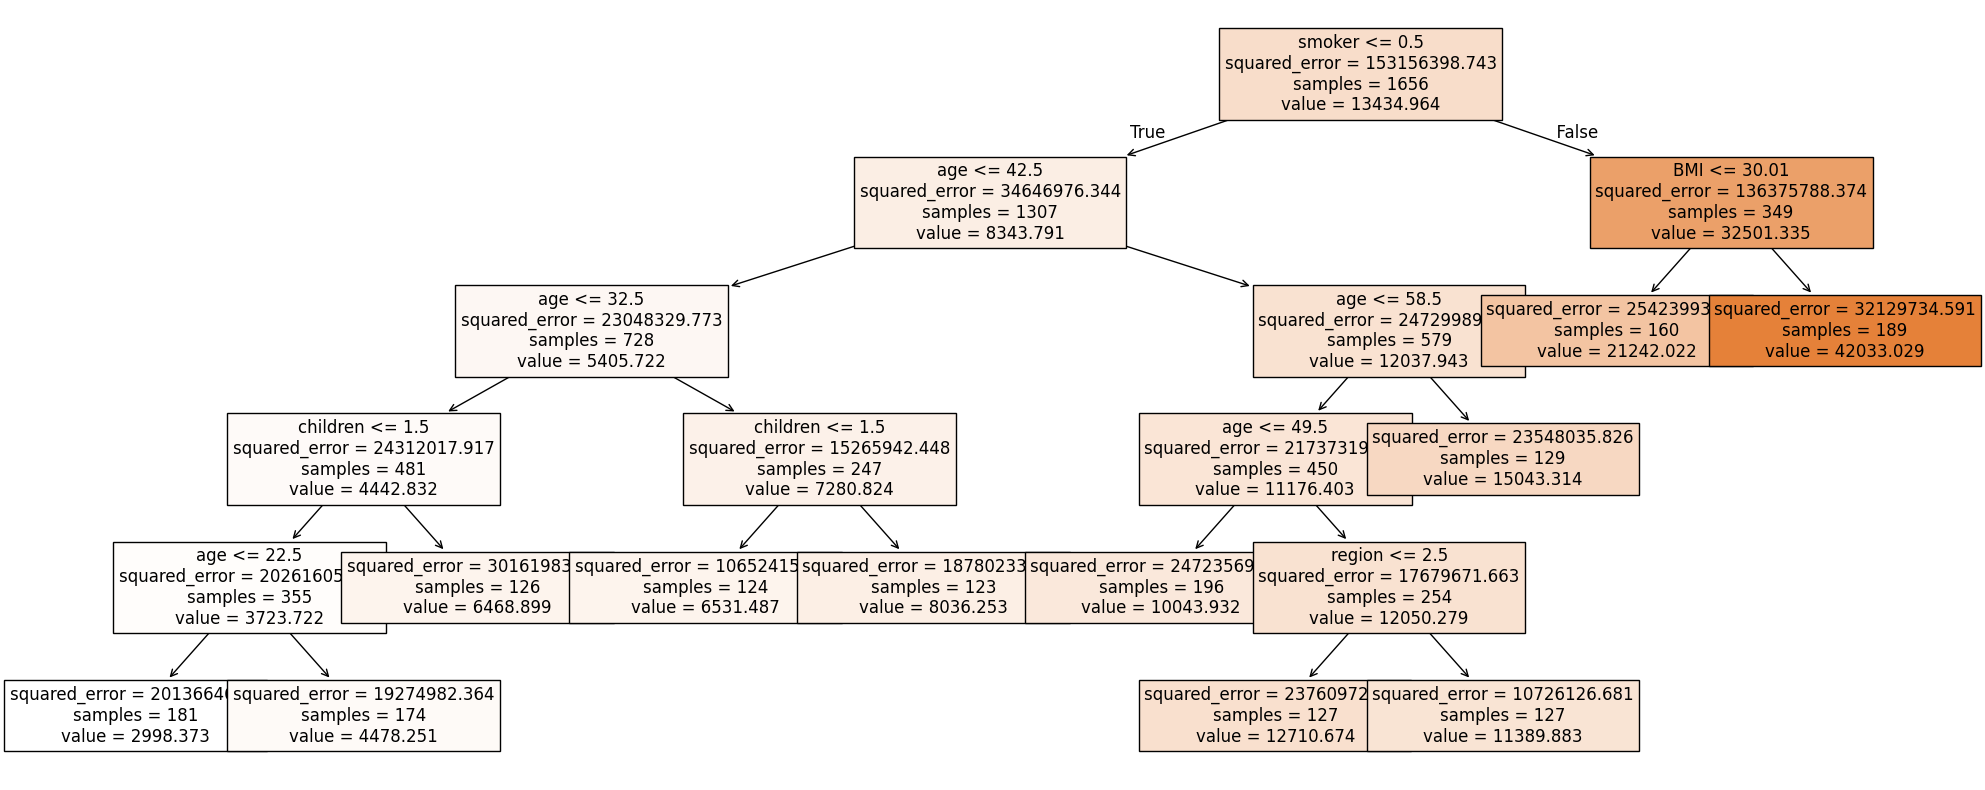

In [ ]:
# Plot the regression tree
fig = plt.figure(figsize=(25,10))
tree.plot_tree(clf_reg, fontsize=12, feature_names=X_tree.columns, filled=True);

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


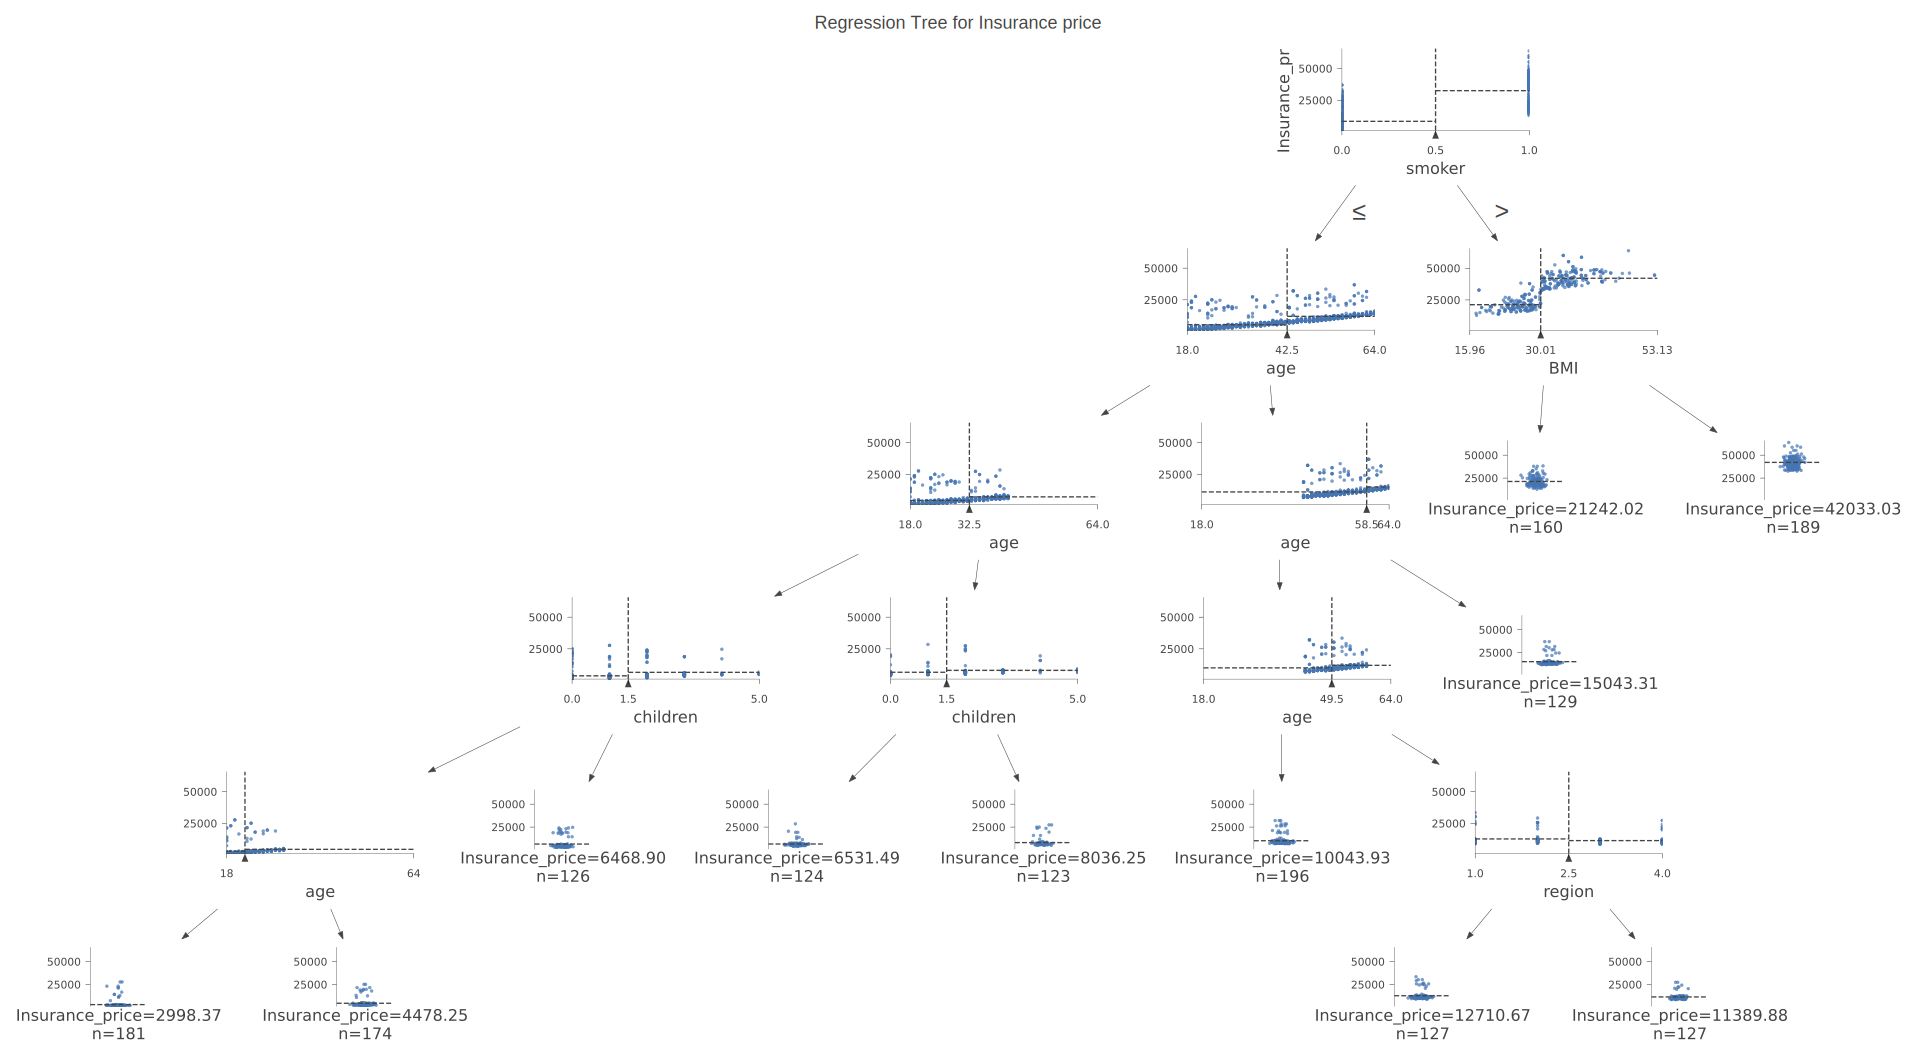

In [ ]:
viz = dtreeviz.model(clf_reg,
               X_train=X_train_reg,
               y_train=y_train_reg,
               target_name='Insurance_price',
               feature_names=X_tree.columns);
viz.view(title="Regression Tree for Insurance price",
         scale=1.8)

In [ ]:
# Evaluate the accuracy of the tree
y_pred_reg = clf_reg.predict(X_test_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg,y_pred_reg))
r2 = r2_score(y_test_reg,y_pred_reg)
print("RMSE=", round(rmse,3), "R2=", round(r2,3))

RMSE= 4857.793 R2= 0.831


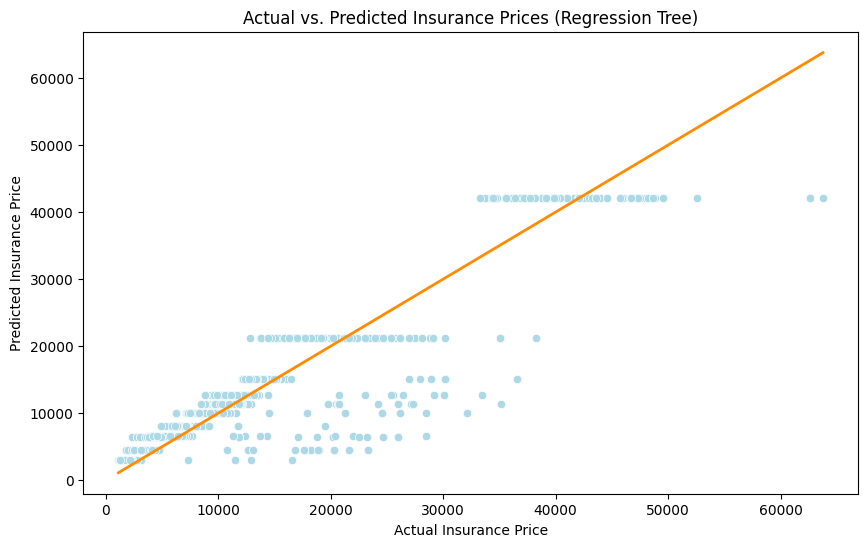

In [ ]:
results_df_tree = pd.DataFrame({'Actual': y_test_reg, 'Predicted': y_pred_reg})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df_tree, x='Actual', y='Predicted', color='lightblue')
plt.title('Actual vs. Predicted Insurance Prices (Regression Tree)')
plt.xlabel('Actual Insurance Price')
plt.ylabel('Predicted Insurance Price')
plt.plot([y_tree.min(), y_tree.max()], [y_tree.min(), y_tree.max()], 'darkorange', lw=2) # Add diagonal line
plt.show()

In [ ]:
# Difference between actual and predicted insurance prices
residuals_tree = y_test_reg - y_pred_reg

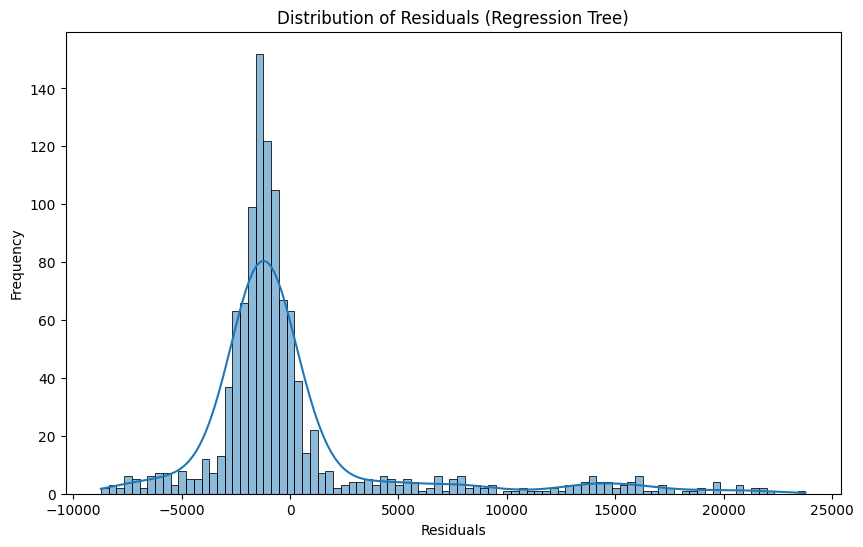

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals_tree, kde=True)
plt.title('Distribution of Residuals (Regression Tree)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_tree = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 10, 20, 40],
    'min_samples_leaf': [1, 5, 10, 20],
    'min_impurity_decrease': [0.0, 0.001, 0.01, 0.1]
}

grid_tree = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid_tree, cv=5, scoring='r2')
grid_tree.fit(X_train_reg, y_train_reg)

print("Best parameters for Regression Tree:", grid_tree.best_params_)
print("Best R^2 score for Regression Tree:", grid_tree.best_score_)

Best parameters for Regression Tree: {'max_depth': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best R^2 score for Regression Tree: 0.8820674116679319


In [ ]:
# Evaluate the tuned model on the test set
y_pred_tuned_tree = grid_tree.best_estimator_.predict(X_test_reg)

rmse_tuned_tree = np.sqrt(mean_squared_error(y_test_reg, y_pred_tuned_tree))
r2_tuned_tree = r2_score(y_test_reg, y_pred_tuned_tree)

print(f"RMSE for Tuned Regression Tree: {rmse_tuned_tree:.3f}")
print(f"R^2 score for Tuned Regression Tree: {r2_tuned_tree:.3f}")

RMSE for Tuned Regression Tree: 4365.189
R^2 score for Tuned Regression Tree: 0.864


In [ ]:
regressionSummary(y_pred_tuned_tree, y_test_reg)


Regression statistics

                      Mean Error (ME) : -138.9394
       Root Mean Squared Error (RMSE) : 4365.1889
            Mean Absolute Error (MAE) : 1330.4069
          Mean Percentage Error (MPE) : -8.0137
Mean Absolute Percentage Error (MAPE) : 14.5764


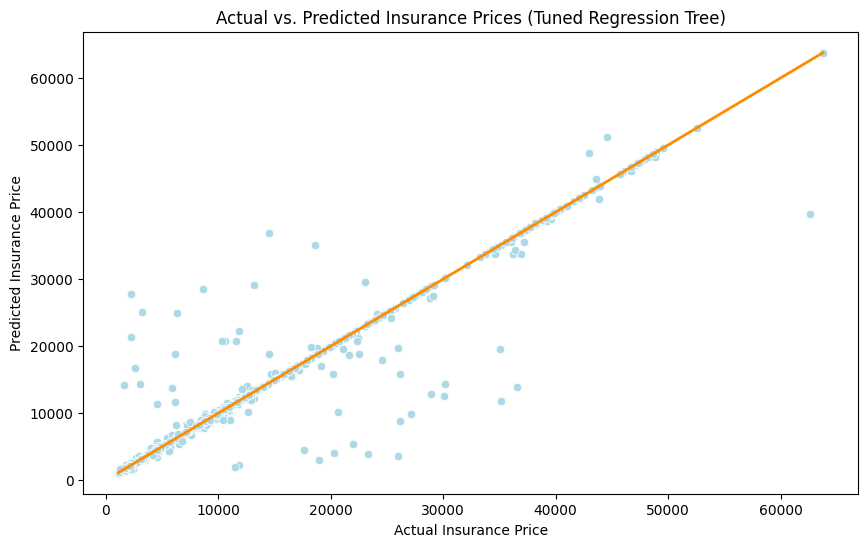

In [ ]:
results_df_tuned_tree = pd.DataFrame({'Actual': y_test_reg, 'Predicted': y_pred_tuned_tree})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df_tuned_tree, x='Actual', y='Predicted', color='lightblue')
plt.title('Actual vs. Predicted Insurance Prices (Tuned Regression Tree)')
plt.xlabel('Actual Insurance Price')
plt.ylabel('Predicted Insurance Price')
plt.plot([y_tree.min(), y_tree.max()], [y_tree.min(), y_tree.max()], 'darkorange', lw=2) # Add diagonal line
plt.show()

In [ ]:
# Access the best trained model from the grid search
best_tree_model = grid_tree.best_estimator_

# Get the feature importances from the Decision Tree Regressor
feature_importances_tree = best_tree_model.feature_importances_

# Get the feature names (make sure they match the order of importances)
feature_names_tree = X_tree.columns

# Create a DataFrame to display feature importances
feature_importance_df_tree = pd.DataFrame({'Feature': feature_names_tree, 'Importance': feature_importances_tree})

# Sort features by importance
feature_importance_df_tree = feature_importance_df_tree.sort_values(by='Importance', ascending=False)

display(feature_importance_df_tree)

Feature  Importance
4    smoker    0.633798
2       BMI    0.216809
0       age    0.110141
5    region    0.019854
3  children    0.015115
1    gender    0.004283

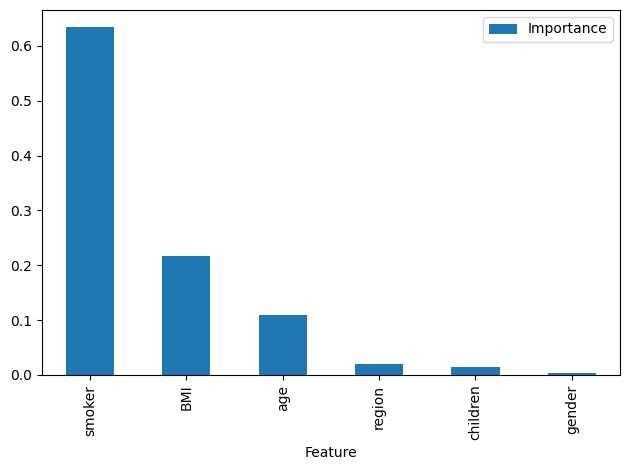

In [ ]:
ax = feature_importance_df_tree.plot(kind='bar', x='Feature')
plt.tight_layout()
plt.show()

# Random Forest

In [ ]:
# Import the Random Forest (RF) classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Create a GridSearchCV object
grid_rf = GridSearchCV(RandomForestRegressor(random_state=2), param_grid_rf, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the training data
grid_rf.fit(X_train_reg, y_train_reg)

# Print the best parameters and best score
print("Best parameters for Random Forest Regressor:", grid_rf.best_params_)
print("Best R^2 score for Random Forest Regressor:", grid_rf.best_score_)

Best parameters for Random Forest Regressor: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R^2 score for Random Forest Regressor: 0.9286675182233829


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
# You can adjust parameters like n_estimators, max_depth, etc.
rf_model = RandomForestRegressor(n_estimators=100, random_state=2)

# Train the model on the training data
rf_model.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_reg)

# Evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))
r2_rf = r2_score(y_test_reg, y_pred_rf)

print(f"RMSE for Random Forest Regressor: {rmse_rf:.3f}")
print(f"R^2 score for Random Forest Regressor: {r2_rf:.3f}")

In [ ]:
regressionSummary(y_pred_rf, y_test_reg)

In [ ]:
results_df_rf = pd.DataFrame({'Actual': y_test_reg, 'Predicted': y_pred_rf})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df_rf, x='Actual', y='Predicted', color='lightblue')
plt.title('Actual vs. Predicted Insurance Prices (Random Forest Regressor)')
plt.xlabel('Actual Insurance Price')
plt.ylabel('Predicted Insurance Price')
plt.plot([y_tree.min(), y_tree.max()], [y_tree.min(), y_tree.max()], 'darkorange', lw=2) # Add diagonal line
plt.show()

NameError: name 'y_pred_rf' is not defined

# K-Nearest Neighbors Regressor

# K-Nearest Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN Regressor model
# You can adjust parameters like n_neighbors
knn_model = KNeighborsRegressor(n_neighbors=5) # Using 5 neighbors as an example

# Train the model on the training data (using the X_train_reg and y_train_reg from previous cells)
knn_model.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_reg)

# Evaluate the model
rmse_knn = np.sqrt(mean_squared_error(y_test_reg, y_pred_knn))
r2_knn = r2_score(y_test_reg, y_pred_knn)

print(f"RMSE for K-Nearest Neighbors Regressor: {rmse_knn:.3f}")
print(f"R^2 score for K-Nearest Neighbors Regressor: {r2_knn:.3f}")

RMSE for K-Nearest Neighbors Regressor: 10071.447
R^2 score for K-Nearest Neighbors Regressor: 0.274


In [ ]:
regressionSummary(y_pred_knn, y_test_reg)


Regression statistics

                      Mean Error (ME) : -1097.0947
       Root Mean Squared Error (RMSE) : 10071.4473
            Mean Absolute Error (MAE) : 6517.2831
          Mean Percentage Error (MPE) : -24.1376
Mean Absolute Percentage Error (MAPE) : 62.9078


In [ ]:
results_df_knn = pd.DataFrame({'Actual': y_test_reg, 'Predicted': y_pred_knn})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df_knn, x='Actual', y='Predicted', color='lightblue')
plt.title('Actual vs. Predicted Insurance Prices (K-Nearest Neighbors Regressor)')
plt.xlabel('Actual Insurance Price')
plt.ylabel('Predicted Insurance Price')
plt.plot([y_tree.min(), y_tree.max()], [y_tree.min(), y_tree.max()], 'darkorange', lw=2) # Add diagonal line
plt.show()

#This is the begining of the classification code, initialy calculating how to pick bins for the 3 part classification (Reid
)

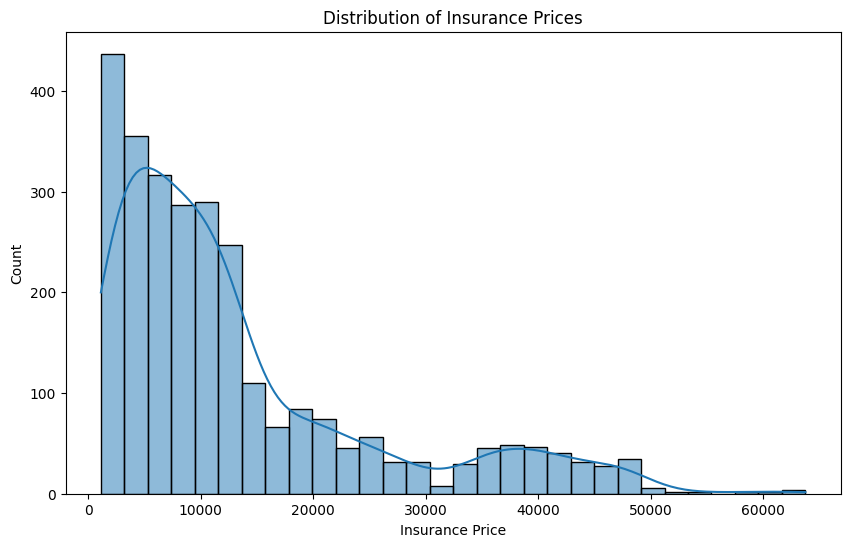

In [ ]:
# Classification Cornor, code generated from Chatgpt

plt.figure(figsize=(10,6))
sns.histplot(insurance_df['insurance_price'], bins=30, kde=True)
plt.title("Distribution of Insurance Prices")
plt.xlabel("Insurance Price")
plt.ylabel("Count")
plt.show()

## Looks like easiest divides are from 0-15000,15000-30000,30000+

In [ ]:
# Creating new DF to mess with so I don't brick primary code
bucketed = insurance_df.copy()
#Dropping values above

#Bucketing Values
bucketed.sort_values(by='insurance_price', ascending=False)[['age', 'smoker', 'BMI', 'insurance_price']].head(20)

age  smoker     BMI  insurance_price
535    54       1  47.410      63770.42801
1920   54       1  47.410      63770.42801
2675   45       1  30.360      62592.87309
1292   45       1  30.360      62592.87309
2606   52       1  34.485      60021.39897
1222   52       1  34.485      60021.39897
1954   31       1  38.095      58571.07448
569    31       1  38.095      58571.07448
2195   33       1  35.530      55135.40209
811    33       1  35.530      55135.40209
2522   60       1  32.800      52590.82939
1138   60       1  32.800      52590.82939
32     28       1  36.400      51194.55914
1412   28       1  36.400      51194.55914
1233   64       1  36.960      49577.66240
2725   64       1  36.960      49577.66240
1342   64       1  36.960      49577.66240
2617   64       1  36.960      49577.66240
1054   59       1  41.140      48970.24760
2438   59       1  41.140      48970.24760

In [ ]:
# Creating new DF with the Catagorization then cutting the insurance price
# so random forest wont just outright use price as the criteria for cut offs.
# Now seeing how well these catagories fit our idea of 3 seperate catagories


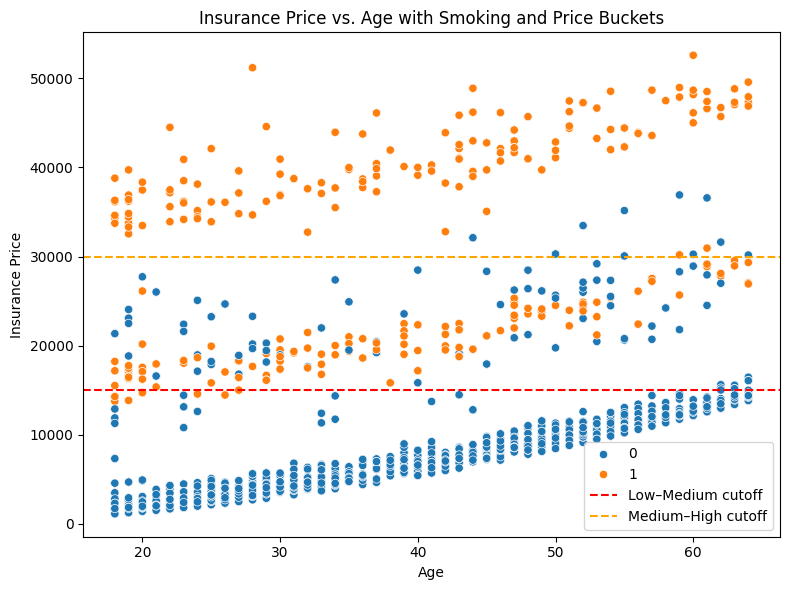

In [ ]:
# Still Chatgpt Code
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=bucketed, x='age', y='insurance_price', hue='smoker', ax=ax)

# Horizontal cutoff lines
ax.axhline(y=15000, color='red', linestyle='--', label='Low–Medium cutoff')
ax.axhline(y=30000, color='orange', linestyle='--', label='Medium–High cutoff')

# Set x-axis ticks every 10 years cleanly
ax.xaxis.set_major_locator(MultipleLocator(10))

# Labels and legend
ax.set_xlabel('Age')
ax.set_ylabel('Insurance Price')
ax.legend()
title = 'Insurance Price vs. Age with Smoking and Price Buckets'
plt.title(title)

plt.tight_layout()
plt.show()



In [ ]:
# now time to cut outliers / values above 55,000 It could be improved
bucketed.drop(bucketed[bucketed['insurance_price'] > 55000].index, inplace=True)
bucketed.sort_values(by='insurance_price', ascending=False)[['age', 'smoker', 'BMI', 'insurance_price']].head(20)


age  smoker     BMI  insurance_price
2522   60       1  32.800      52590.82939
1138   60       1  32.800      52590.82939
1412   28       1  36.400      51194.55914
32     28       1  36.400      51194.55914
2617   64       1  36.960      49577.66240
2725   64       1  36.960      49577.66240
1233   64       1  36.960      49577.66240
1342   64       1  36.960      49577.66240
1054   59       1  41.140      48970.24760
2438   59       1  41.140      48970.24760
480    44       1  38.060      48885.13561
1865   44       1  38.060      48885.13561
171    63       1  37.700      48824.45000
1553   63       1  37.700      48824.45000
1907   57       1  42.130      48675.51770
522    57       1  42.130      48675.51770
2277   60       1  40.920      48673.55880
893    60       1  40.920      48673.55880
1659   54       1  40.565      48549.17835
274    54       1  40.565      48549.17835

In [ ]:
# Creating the buckets

bucketed['risk_level'] = pd.cut(
    bucketed['insurance_price'],
    bins=[0, 15000, 30000, bucketed['insurance_price'].max()],
    labels=['Low', 'Medium', 'High']
)

In [ ]:
# Chat code stitched together
# Features (exclude insurance_price and risk_level)
# Random Forest V1


X = bucketed.drop(columns=['insurance_price', 'risk_level'])

# Target
y = bucketed['risk_level']

# Convert categorical variables if needed (like 'smoker')
X = pd.get_dummies(X, drop_first=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Train Tree
model = DecisionTreeClassifier(max_depth=4, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

#Test Tree
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print('Random Forest Results:')
print(classification_report(y_test, y_pred))



[[ 58   4   4]
 [  1 402   3]
 [  0  29  50]]
Random Forest Results:
              precision    recall  f1-score   support

        High       0.98      0.88      0.93        66
         Low       0.92      0.99      0.96       406
      Medium       0.88      0.63      0.74        79

    accuracy                           0.93       551
   macro avg       0.93      0.83      0.87       551
weighted avg       0.92      0.93      0.92       551



In [ ]:
###Logistical Regression V1


features = ['age', 'gender', 'BMI', 'children', 'smoker', 'region']
target = 'risk_level'

X = bucketed[features]
y = bucketed[target]

X_encoded = pd.get_dummies(X, drop_first=True)

numeric_cols = ['age', 'BMI', 'children']
scaler = StandardScaler()
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

##Train multinomial logistic regression

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced', max_iter=500, random_state=42)
logreg.fit(X_train, y_train)

##Predict classes and probabilities

y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)

##Evaluate model

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nLogistical Regression Results:")
print(classification_report(y_test, y_pred))

##Feature coefficients for interpretation

coef_df = pd.DataFrame(logreg.coef_, columns=X_encoded.columns, index=logreg.classes_)
print("\nFeature Coefficients by Class:")
print(coef_df)

###Convert coefficients to odds ratios

odds_df = pd.DataFrame(np.exp(logreg.coef_), columns=X_encoded.columns, index=logreg.classes_)
print("\nFeature Odds Ratios by Class:")
print(odds_df)



Confusion Matrix:
[[ 59   4   3]
 [  7 387  12]
 [  2  31  46]]

Logistical Regression Results:
              precision    recall  f1-score   support

        High       0.87      0.89      0.88        66
         Low       0.92      0.95      0.93       406
      Medium       0.75      0.58      0.66        79

    accuracy                           0.89       551
   macro avg       0.85      0.81      0.82       551
weighted avg       0.89      0.89      0.89       551


Feature Coefficients by Class:
             age    gender       BMI  children    smoker    region
High    0.229436  0.017198  1.507499  0.177601  4.527027 -0.072380
Low    -0.271474 -0.021655 -0.671002 -0.225309 -4.619155  0.081221
Medium  0.042038  0.004458 -0.836497  0.047709  0.092127 -0.008842

Feature Odds Ratios by Class:
             age    gender       BMI  children     smoker    region
High    1.257891  1.017346  4.515424  1.194348  92.483237  0.930177
Low     0.762255  0.978577  0.511196  0.798269   0.00986

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.


In [ ]:
## Pt 2 Post classification regression production


